1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [17]:
path = r'/Users/thaliagiraldo/Library/Mobile Documents/com~apple~CloudDocs/CareerFoundry/Immersion/Lesson 6'
 

In [18]:
df = pd.read_csv(os.path.join(path,'OHE_cleaned_Feb1.csv'), index_col = False) 

2. Data Cleaning

In [20]:
df = df.drop(columns = ['Unnamed: 0'])

In [22]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'trip_duration', 'trip_distance_miles',
       'trip_date_start', 'trip_date_end', 'start_time', 'end_time',
       'ride_day_of_week', 'ride_day_of_week_numeric', 'hour_start_time',
       'time_of_day', 'classic_bike', 'electric_bike', 'casual', 'member'],
      dtype='object')

In [23]:
df.shape

(362464, 27)

In [26]:
df.head(5)

ride_id  rideable_type           started_at             ended_at  \
0  4EAD8F1AD547356B  electric_bike  2023-11-30 21:50:00  2023-11-30 22:13:00   
1  6322270563BF5470  electric_bike  2023-11-03 09:44:00  2023-11-03 10:17:00   
2  B37BDE091ECA38E0  electric_bike  2023-11-30 11:39:00  2023-11-30 11:40:00   
3  CF0CA5DD26E4F90E   classic_bike  2023-11-08 10:01:00  2023-11-08 10:27:00   
4  EB8381AA641348DB   classic_bike  2023-11-03 16:20:00  2023-11-03 16:54:00   

       start_station_name start_station_id               end_station_name  \
0         Millennium Park            13008  Pine Grove Ave & Waveland Ave   
1  Broadway & Sheridan Rd            13323         Broadway & Sheridan Rd   
2   State St & Pearson St     TA1307000061          State St & Pearson St   
3     Theater on the Lake     TA1308000001            Theater on the Lake   
4     Theater on the Lake     TA1308000001            Theater on the Lake   

  end_station_id  start_lat  start_lng  ...  start_time  end_time  \
0   TA1307000150  41.881101 -87.624082  ...    09:50 PM  10:13 PM   
1          13323  41.952868 -87.650035  ...    09:44 AM  10:17 AM   
2   TA1307000061  41.897533 -87.628694  ...    11:39 AM  11:40 AM   
3   TA1308000001  41.926277 -87.630834  ...    10:01 AM  10:27 AM   
4   TA1308000001  41.926277 -87.630834  ...    04:20 PM  04:54 PM   

  ride_day_of_week  ride_day_of_week_numeric  hour_start_time time_of_day  \
0         Thursday                         3               21     evening   
1           Friday                         4                9     morning   
2         Thursday                         3               11     morning   
3        Wednesday                         2               10     morning   
4           Friday                         4               16   afternoon   

  classic_bike electric_bike casual member  
0            0             1      0      1  
1            0             1      0      1  
2            0             1      0      1  
3            1             0      0      1  
4            1             0      0      1  

[5 rows x 27 columns]

In [27]:
#Check for missing values
# 350 missing trip distance miles missing because these are bikes that were lost or stolen. 
#they have no distance data bc there's no drop off location
df.isnull().sum()

ride_id                       0
rideable_type                 0
started_at                    0
ended_at                      0
start_station_name            0
start_station_id              0
end_station_name              0
end_station_id                0
start_lat                     0
start_lng                     0
end_lat                       0
end_lng                       0
member_casual                 0
trip_duration                 0
trip_distance_miles         350
trip_date_start               0
trip_date_end                 0
start_time                    0
end_time                      0
ride_day_of_week              0
ride_day_of_week_numeric      0
hour_start_time               0
time_of_day                   0
classic_bike                  0
electric_bike                 0
casual                        0
member                        0
dtype: int64

In [ ]:
#Duplicates check 

In [30]:
dups = df.duplicated()


In [31]:
dups.shape #no dups

(362464,)

/var/folders/t7/fy2gbqpj7r54t9fzj4_6j2v80000gn/T/ipykernel_5482/300262375.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trip_duration'], bins = 200)
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='trip_duration', ylabel='Density'>

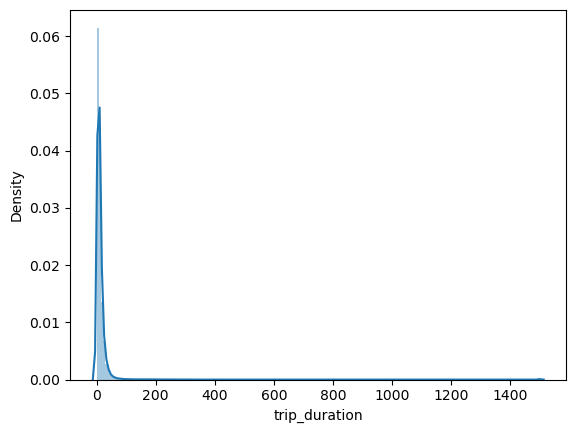

In [34]:
#Extreme Values Check - duration
#most trips are short durations so there are some extreme values I may need to remove
sns.distplot(df['trip_duration'], bins = 200)

In [36]:
#13 min average trip duration
df['trip_duration'].mean()

13.833354484859186

In [37]:
#8 minute trip median ~2 miles
df['trip_duration'].median()

8.0

In [38]:
df['trip_duration'].max()

1501.0

In [43]:
# Set display options to show all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [44]:
#99% of rides are under an hour. Made a df for high duration rides 
high_duration = df[df['trip_duration'] >= 60]


Identifying Outliers 

In [45]:
high_duration

ride_id  rideable_type           started_at  \
6       1763B0A2778C185E   classic_bike  2023-11-09 11:55:00   
24      FCC7A68E7AA5680B   classic_bike  2023-11-05 16:12:00   
25      4CA65C061A14C915   classic_bike  2023-11-05 16:13:00   
82      DB57CB53F09C86F6   classic_bike  2023-11-23 12:01:00   
83      79C8FBF95796A972   classic_bike  2023-11-11 21:32:00   
86      F8C18B331F69C7A9   classic_bike  2023-11-12 14:02:00   
88      AB46926F4AE45D68   classic_bike  2023-11-12 10:37:00   
105     0CC41A38013E2231   classic_bike  2023-11-19 17:59:00   
110     C94469A9EDA90B66   classic_bike  2023-11-05 14:28:00   
166     A3DB9C0089A1A767   classic_bike  2023-11-19 12:04:00   
191     D56FF5C754345D52   classic_bike  2023-11-07 18:37:00   
230     18A2D0E0D16C2017   classic_bike  2023-11-15 16:19:00   
245     16E3D3734B94DD70   classic_bike  2023-11-22 18:29:00   
250     BEBBE0B1B7DCA284  electric_bike  2023-11-04 11:53:00   
256     39626FC46D21E8A3   classic_bike  2023-11-05 19:38:00   
261     4616E3950EDAD755   classic_bike  2023-11-13 15:40:00   
262     C964CD7717DC0044   classic_bike  2023-11-13 15:38:00   
277     5649042B6330522C   classic_bike  2023-11-02 08:33:00   
581     8DB37534374C329A   classic_bike  2023-11-18 14:08:00   
591     A2A5AA0C8F65730A   classic_bike  2023-11-05 12:07:00   
615     057F4709BE661D97   classic_bike  2023-11-19 11:49:00   
626     DED245D83D9D5227   classic_bike  2023-11-11 10:59:00   
628     A8112F66A5233BD4   classic_bike  2023-11-11 11:00:00   
629     8DFC6B741DE4C459   classic_bike  2023-11-11 10:59:00   
672     A82F2CF0DE24F7C0   classic_bike  2023-11-11 14:54:00   
674     F88EFC9931741168   classic_bike  2023-11-04 14:16:00   
695     42E8D0B3B0A2383D   classic_bike  2023-11-19 14:37:00   
717     A5033984E0F74F88   classic_bike  2023-11-09 10:52:00   
831     AA196E2AE53E7083   classic_bike  2023-11-11 12:39:00   
843     9F1BCBA20AB4D250   classic_bike  2023-11-02 15:34:00   
862     A6E8A9CBF47B49CA   classic_bike  2023-11-25 12:25:00   
867     915325386492C2F7   classic_bike  2023-11-25 12:29:00   
888     259768F622DFEB85   classic_bike  2023-11-13 12:23:00   
997     000ABE319E970CB6  electric_bike  2023-11-19 11:24:00   
1165    9AF091B2A3CFB303   classic_bike  2023-11-16 13:16:00   
1180    8F6F8C9EC3116772   classic_bike  2023-11-07 07:06:00   
1217    C64E2F0FAE19F064   classic_bike  2023-11-08 14:12:00   
1238    06374AC08383959E   classic_bike  2023-11-15 14:51:00   
1243    D575104B9DC5DB37  electric_bike  2023-11-05 12:00:00   
1253    BD2F6D04B0DE7DFE   classic_bike  2023-11-16 11:34:00   
1256    3D19440CA312FD56  electric_bike  2023-11-14 13:39:00   
1258    37354FA1E5EB7E67  electric_bike  2023-11-14 13:37:00   
1270    9FF39082539D251B   classic_bike  2023-11-19 15:46:00   
1271    27D713C19B63AAAF   classic_bike  2023-11-19 15:44:00   
1283    26FA7713B48815C3  electric_bike  2023-11-11 14:50:00   
1296    333213FB80FD9680   classic_bike  2023-11-16 13:15:00   
1344    AF3AA0C3A533A69B   classic_bike  2023-11-06 18:05:00   
1438    84213F92F56998FE  electric_bike  2023-11-07 16:39:00   
1594    340BD9F5E356C19A   classic_bike  2023-11-10 22:20:00   
1634    335D15FC2B3D3588   classic_bike  2023-11-04 14:30:00   
1635    F8DCFC4DFD4D065A   classic_bike  2023-11-04 14:29:00   
1637    07EAFF0F68F4384E   classic_bike  2023-11-15 14:05:00   
1669    2DFCE39ED0E9C13C   classic_bike  2023-11-19 09:35:00   
1687    B0A059CD09D774DC   classic_bike  2023-11-05 18:34:00   
1688    B2377A759E29B22B   classic_bike  2023-11-12 17:39:00   
1689    DC83D887CD9A9C78   classic_bike  2023-11-12 14:23:00   
1690    D5E89723E7C94A83   classic_bike  2023-11-12 14:24:00   
1691    798AEE5115F5B43C   classic_bike  2023-11-14 15:29:00   
1730    F53A444D71D63EFA   classic_bike  2023-11-19 15:09:00   
1731    ACBAFCF481FDDC5D   classic_bike  2023-11-19 15:09:00   
1845    E28EB929EAB935C0   classic_bike  2023-11-03 17:30:00   
1880    BDB3FE510EA9E8B2  electric_bike  2023-11-

In [49]:
#finding the standard deviation of trip duration 
std_dev = np.std(df['trip_duration'])
std_dev

55.121083346791295

In [51]:
# Set the multiplier
multiplier = 3

# Calculate lower and upper bounds
lower_bound = np.mean(df['trip_duration']) - multiplier * std_dev
upper_bound = np.mean(df['trip_duration']) + multiplier * std_dev


In [78]:
#Identify outliers
outliers = df['trip_duration'][( df['trip_duration']< lower_bound) | (df['trip_duration'] > upper_bound)]
outliers

245        729.0
277        279.0
1253       637.0
1438       222.0
2713       631.0
2914       706.0
3574      1356.0
3881       212.0
3882       212.0
3883       213.0
4462       373.0
5656      1330.0
5683       231.0
6858       298.0
6919       280.0
6999      1067.0
7375      1127.0
7525       574.0
7681      1157.0
8071       198.0
8447       363.0
8566       204.0
8859       194.0
9537       217.0
9877       646.0
10338      952.0
10461     1348.0
10711     1171.0
11571      223.0
11838      194.0
11860     1065.0
12296      498.0
12418      203.0
12419      203.0
12420      203.0
13361      249.0
13468      195.0
13550      281.0
14385      925.0
14482      246.0
14483      247.0
14666      826.0
15228      230.0
15649      758.0
15957      245.0
17458      478.0
18194      668.0
18897      983.0
19179      799.0
19737     1114.0
20947     1353.0
21706      269.0
21765      768.0
22078      721.0
22708      232.0
22972     1422.0
23635      688.0
24554      687.0
25408      187

In [56]:
outliers.value_counts

<bound method IndexOpsMixin.value_counts of 245        729.0
277        279.0
1253       637.0
1438       222.0
2713       631.0
2914       706.0
3574      1356.0
3881       212.0
3882       212.0
3883       213.0
4462       373.0
5656      1330.0
5683       231.0
6858       298.0
6919       280.0
6999      1067.0
7375      1127.0
7525       574.0
7681      1157.0
8071       198.0
8447       363.0
8566       204.0
8859       194.0
9537       217.0
9877       646.0
10338      952.0
10461     1348.0
10711     1171.0
11571      223.0
11838      194.0
11860     1065.0
12296      498.0
12418      203.0
12419      203.0
12420      203.0
13361      249.0
13468      195.0
13550      281.0
14385      925.0
14482      246.0
14483      247.0
14666      826.0
15228      230.0
15649      758.0
15957      245.0
17458      478.0
18194      668.0
18897      983.0
19179      799.0
19737     1114.0
20947     1353.0
21706      269.0
21765      768.0
22078      721.0
22708      232.0
22972     1422.0
2363

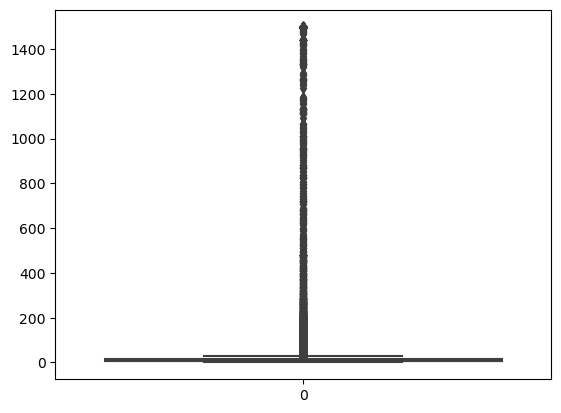

In [57]:
#Anything higher than 178 is an outlier, 3 SD from the mean
sns.boxplot(df['trip_duration'])
plt.show()

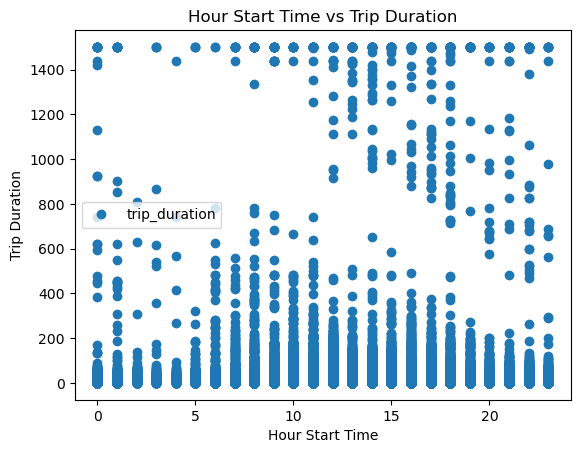

In [58]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
#trip duration and hour start time

df.plot(x = 'hour_start_time', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Hour Start Time vs Trip Duration')  
plt.xlabel('Hour Start Time')  
plt.ylabel('Trip Duration')  
plt.show()

In [59]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['hour_start_time'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [60]:
X

array([[21],
       [ 9],
       [11],
       ...,
       [19],
       [ 9],
       [16]])

In [61]:
y

array([[23.],
       [33.],
       [ 1.],
       ...,
       [ 9.],
       [ 2.],
       [ 1.]])

In [62]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

4. Regression Analysis

In [63]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [64]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

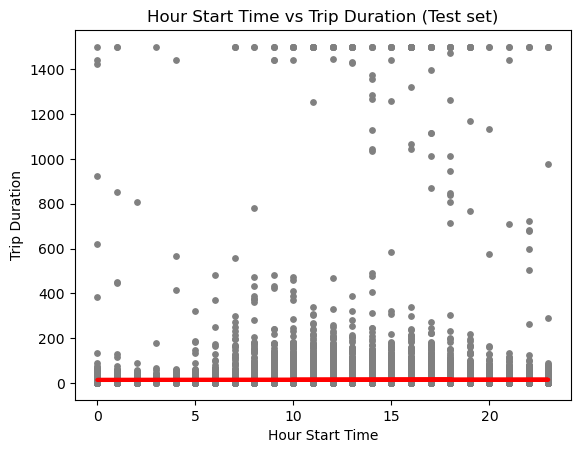

In [66]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Hour Start Time vs Trip Duration (Test set)')
plot_test.xlabel('Hour Start Time')
plot_test.ylabel('Trip Duration')
plot_test.show()

In [67]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [68]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

#based on the R2 score, your linear regression model does not seem to be a good fit for explaining the variability in the dependent variable. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04177908]]
Mean squared error:  2926.3558944533575
R2 score:  -1.0539756769567532e-05


In [69]:
y_predicted

array([[13.74327916],
       [13.8686164 ],
       [13.57616284],
       ...,
       [13.99395364],
       [14.0775118 ],
       [14.0775118 ]])

In [70]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     13.0  13.743279
1     12.0  13.868616
2      7.0  13.576163
3      4.0  13.826837
4      5.0  14.202849
5      4.0  13.993954
6     26.0  13.993954
7      3.0  14.202849
8     15.0  13.701500
9      3.0  13.910395
10     4.0  13.993954
11    22.0  13.659721
12     3.0  14.161070
13     4.0  13.910395
14     4.0  13.367267
15    10.0  14.161070
16     5.0  13.785058
17    11.0  13.659721
18    22.0  13.659721
19     4.0  13.701500
20     5.0  14.202849
21     8.0  14.077512
22     5.0  13.868616
23   209.0  13.910395
24    11.0  13.701500
25     8.0  14.077512
26     6.0  14.202849
27     6.0  13.617942
28     5.0  14.119291
29     9.0  13.868616

#Compare how the regression fits the training set

In [72]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [73]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [74]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04177908]]
Mean squared error:  3086.282917807052
R2 score:  1.3255728621208718e-05


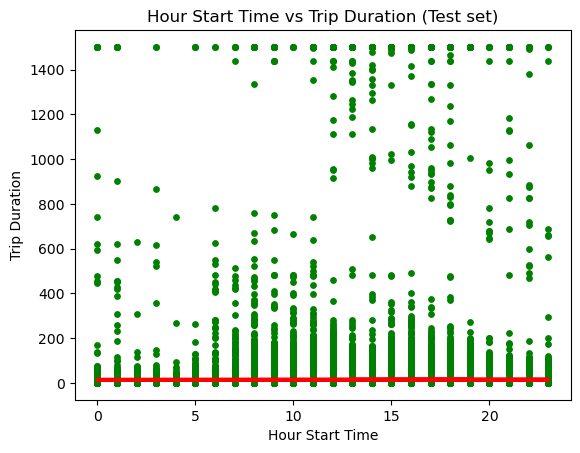

In [75]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Hour Start Time vs Trip Duration (Test set)')
plot_test.xlabel('Hour Start Time')
plot_test.ylabel('Trip Duration')
plot_test.show()

In [76]:
### Bonus: performance improvement after removing outliers

In [80]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency and standard deviation/outlier checks.

df_test = df[df['trip_duration'] <=178] 

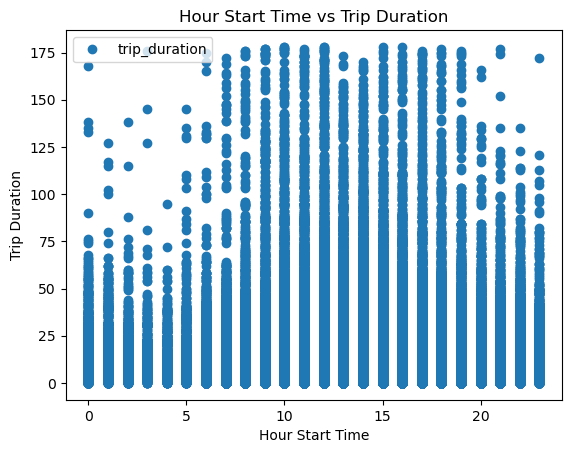

In [83]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'hour_start_time', y='trip_duration', style='o')  
plt.title('Hour Start Time vs Trip Duration')  
plt.xlabel('Hour Start Time')  
plt.ylabel('Trip Duration')  
plt.show()

In [84]:
# Reshape again.

X_2 = df_test['hour_start_time'].values.reshape(-1,1)
y_2 = df_test['trip_duration'].values.reshape(-1,1)

In [85]:
#Split the data into train and test

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [86]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [87]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [88]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [89]:
#Even though the mean squared is smaller, it is not large enough to say the prediction is not accurate
#The r2 shows that it is not a good fit. too much variance in the data

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03244716]]
Mean squared error:  153.23064791891733
R2 score:  8.482042959767622e-05


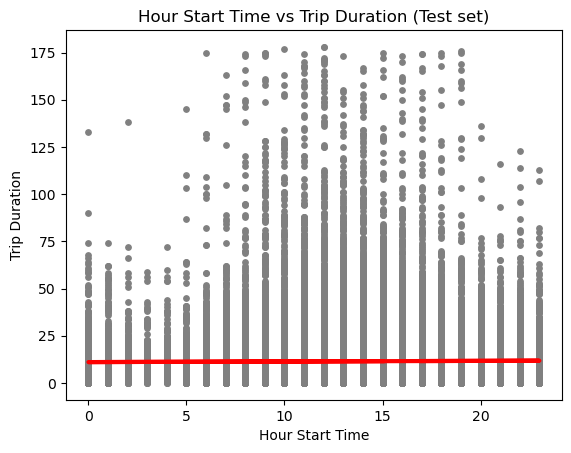

In [90]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Hour Start Time vs Trip Duration (Test set)')
plot_test.xlabel('Hour Start Time')
plot_test.ylabel('Trip Duration')
plot_test.show()

In [91]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

Actual  Predicted
0      8.0  11.519695
1     13.0  11.454801
2     16.0  11.584590
3     11.0  11.519695
4     18.0  11.325012
5     14.0  11.260118
6     15.0  11.617037
7      4.0  11.357460
8     11.0  11.714378
9     46.0  11.487248
10     7.0  11.681931
11     3.0  11.292565
12     1.0  11.519695
13    17.0  11.357460
14     4.0  11.487248
15     5.0  11.681931
16     7.0  11.325012
17     7.0  11.292565
18    10.0  11.617037
19     1.0  11.487248
20    14.0  11.584590
21    13.0  11.454801
22     4.0  11.292565
23    12.0  11.519695
24     6.0  11.519695
25     6.0  11.422354
26     3.0  11.357460
27    10.0  11.552143
28     5.0  11.584590
29    12.0  11.292565